## Step 1:

**Import Basic Scikit Learn Libraries for Data Manipulation as well as Data Visualization.**

In [1]:
# Import Data Manipulation Libraries
import numpy as np
import pandas as pd

# Import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data Filter Warning Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Data Logging Libraries
import logging
logging.basicConfig(level = logging.INFO,
                    filename = 'model.log',
                    filemode = 'w',
                    format = '%(asctime)s - %(levelname)s - %(message)s')

## Step 2:
Data Uploading using Pandas Function


In [2]:
#Load the dataset
url = 'https://raw.githubusercontent.com/vinnithakur/CementCompositeStrength_PredictionModel/refs/heads/main/concrete_data.csv '
df = pd.read_csv(url, sep=",")
df.sample(frac = 1)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
147,388.6,97.1,0.0,157.9,12.1,852.1,925.7,56,55.20
93,374.0,189.2,0.0,170.1,10.1,926.1,756.7,7,46.20
390,450.1,50.0,0.0,200.0,3.0,1124.4,613.2,28,39.38
931,144.0,15.0,195.0,176.0,6.0,1021.0,709.0,28,15.34
322,249.1,0.0,98.8,158.1,12.8,987.8,889.0,56,42.03
...,...,...,...,...,...,...,...,...,...
936,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
971,312.7,144.7,0.0,127.3,8.0,999.7,822.2,28,44.52
905,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1008,160.2,188.0,146.4,203.2,11.3,828.7,709.7,28,35.31


## Step 3:
Doing Exploratory Data Analysis [EDA]  :-->

1. Univariate Analysis

2. Bivariate Analysis

In [3]:
from collections import OrderedDict

stats = []

for i in df.columns:
    numerical_stats = OrderedDict({
        'Feature': i,
        'Type' : df[i].dtype,
        'Missing Values' : df[i].isnull().sum(),
        'Unique Values' : df[i].nunique(),
        'Mode' : df[i].mode().values[0],
        'Mean' : df[i].mean(),
        'Median' : df[i].median(),
        'Standard Deviation' : df[i].std(),
        'Kurtosis' : df[i].kurtosis(),
        'IQR' : df[i].quantile(0.75) - df[i].quantile(0.25),
    })
    
    stats.append(numerical_stats)
    
df_stats = pd.DataFrame(stats)
df_stats.style.background_gradient(subset=['Missing Values', 'Unique Values', 'Mean', 'Median', 'Standard Deviation', 'Kurtosis', 'IQR'], cmap='Reds')

,Feature,Type,Missing Values,Unique Values,Mode,Mean,Median,Standard Deviation,Kurtosis,IQR
0,cement,float64,0,278,362.600000,281.167864,272.900000,104.506364,-0.520652,157.625000
1,blast_furnace_slag,float64,0,185,0.000000,73.895825,22.000000,86.279342,-0.508175,142.950000
2,fly_ash,float64,0,156,0.000000,54.188350,0.000000,63.997004,-1.328746,118.300000
3,water,float64,0,195,192.000000,181.567282,185.000000,21.354219,0.122082,27.100000
4,superplasticizer,float64,0,111,0.000000,6.204660,6.400000,5.973841,1.411269,10.200000
5,coarse_aggregate,float64,0,284,932.000000,972.918932,968.000000,77.753954,-0.599016,97.400000
6,fine_aggregate,float64,0,302,594.000000,773.580485,779.500000,80.175980,-0.102177,93.050000
7,age,int64,0,14,28.000000,45.662136,28.000000,63.169912,12.168989,49.000000
8,concrete_compressive_strength,float64,0,845,33.400000,35.817961,34.445000,16.705742,-0.313725,22.425000


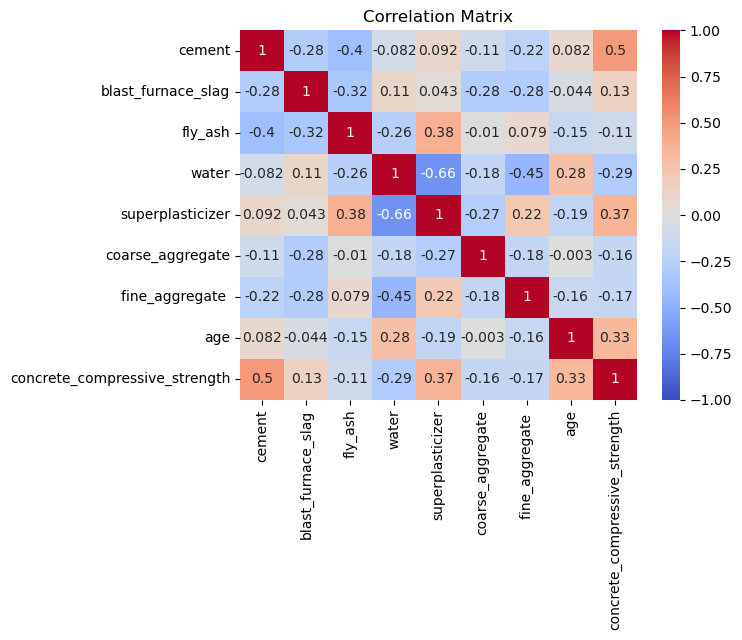

In [4]:
# Checking Correlation Matrix 
# X = Independent Variables
# y = Dependent  Variable  ----> ['concrete_compressive_strength']

sns.heatmap(df.corr(), annot=True,yticklabels=True,center=0, cmap='coolwarm', vmax=1, vmin=-1)
plt.title('Correlation Matrix')
plt.show()

In [5]:
# Understanding Features and Create New Feature Based on Existing Feature ---> Feature Engineering
df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
Name: concrete_compressive_strength, dtype: float64

In [6]:
df['Composite_Ratio'] = 1/((df['cement'] + df['superplasticizer']+ df['blast_furnace_slag'])/ (df['water']))

In [7]:
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,Composite_Ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,0.298618
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,0.298618
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,0.480000
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,0.480000
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,0.580060
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,0.447545
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,0.589296
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,0.655442
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,0.491739


# **Feature Engineering:**

In [8]:
df['cement_to_water_ratio'] = 1/df['cement'] / df['water']

In [9]:
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,Composite_Ratio,cement_to_water_ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,0.298618,0.000011
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,0.298618,0.000011
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,0.480000,0.000013
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,0.480000,0.000013
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,0.580060,0.000026
...,...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,0.447545,0.000020
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,0.589296,0.000016
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,0.655442,0.000035
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,0.491739,0.000036


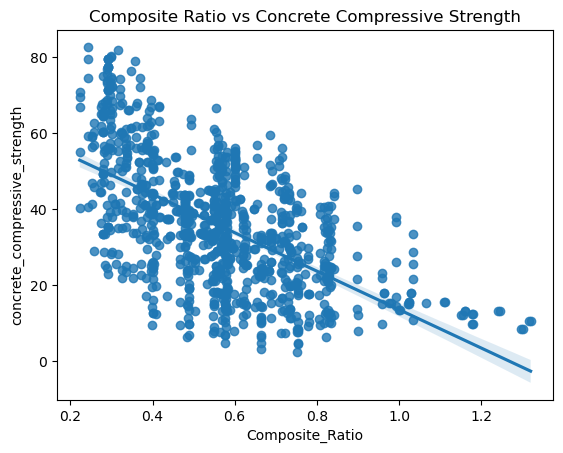

In [10]:
sns.regplot(x = df['Composite_Ratio'], y = df['concrete_compressive_strength'])
plt.title('Composite Ratio vs Concrete Compressive Strength')
plt.show()

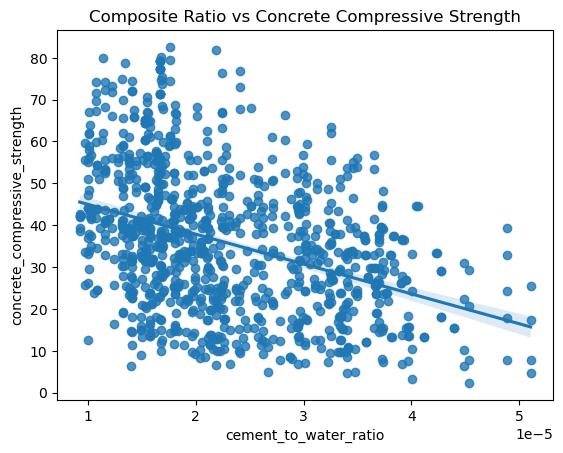

In [11]:
sns.regplot(x = df['cement_to_water_ratio'], y = df['concrete_compressive_strength'])
plt.title('Composite Ratio vs Concrete Compressive Strength')
plt.show()

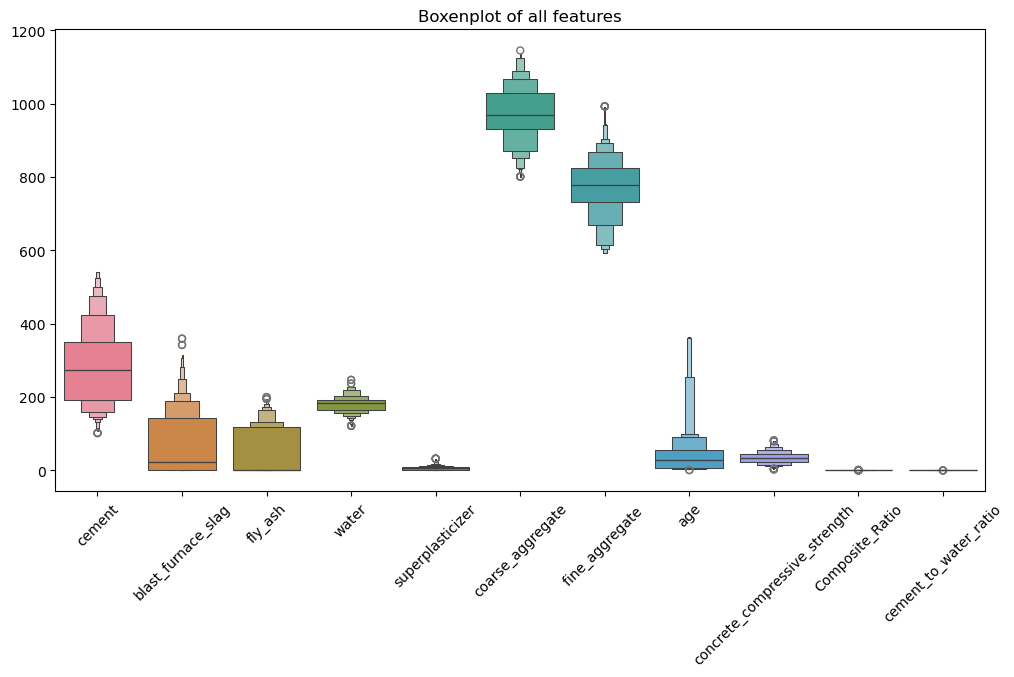

In [25]:
#Boxplot

plt.figure(figsize=(12, 6))
sns.boxenplot(data=df)
plt.xticks(rotation=45)  #Rotate x-axis labels for better readability
plt.title("Boxenplot of all features")
plt.show()

In [12]:
# Use Variance Inflation Factor (VIF) to check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop(columns = ['concrete_compressive_strength'])  #All Independent variables
X = X.assign(constant=1)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#Drop the constant column from the result
vif_data = vif_data[vif_data["feature"]!= "constant"]

#Display VIF values
print(vif_data)

                 feature        VIF
0                 cement  17.428889
1     blast_furnace_slag  10.595666
2                fly_ash   6.234201
3                  water  10.208171
4       superplasticizer   3.108445
5       coarse_aggregate   5.259035
6        fine_aggregate    7.259157
7                    age   1.119426
8        Composite_Ratio   9.097965
9  cement_to_water_ratio   8.151701


## **Data Insights**:

1. Higher value of VIF Suggest Multi Collinearity.  [VIF >10]  ---> Column Shows Multicollinearity.

2. Such columns must be removed before applying any Regression Model.

## Step 4: 
Splitting the dataset into training and testing sets.
Also using Train and Test Split to Prevent Data Leakage

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = 'concrete_compressive_strength',axis=1)
y = df['concrete_compressive_strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Using Scaling Technique

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Composite_Ratio,cement_to_water_ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,0.298618,0.000011
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,0.298618,0.000011
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,0.480000,0.000013
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,0.480000,0.000013
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,0.580060,0.000026
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,0.447545,0.000020
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,0.589296,0.000016
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,0.655442,0.000035
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,0.491739,0.000036


In [16]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
r2_score_LR = r2_score(y_test, y_pred_LR)
r2_score_LR

0.6080190034601016

In [17]:
# Decision Tree Regression 


from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
y_pred_DT = DT.predict(X_test)

r2_score_DT = r2_score(y_test, y_pred_DT)

print(f'The R2 Score for Decision Tree Regression Model is: ', {r2_score_DT * 100})

The R2 Score for Decision Tree Regression Model is:  {83.23135188739317}


In [18]:
# Random Forest Regression


from sklearn.ensemble import RandomForestRegressor

RF = DecisionTreeRegressor()
RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)

r2_score_RF = r2_score(y_test, y_pred_RF)

print(f'The R2 Score for Random Forest Model is: ', {r2_score_RF * 100})

The R2 Score for Random Forest Model is:  {82.61743254110728}


In [19]:
# Checking the Model Performance

mse_LR = mean_squared_error(y_test, y_pred_LR)
mse_DT = mean_squared_error(y_test, y_pred_DT)

mae_LR = mean_absolute_error(y_test, y_pred_LR)
mae_DT = mean_absolute_error(y_test, y_pred_DT)

print(f'Mean Squared Error (MSE) for Linear Regression Model is: ', {mse_LR})
print(f'Mean Squared Error (MSE) for Decision Tree Regression Model is: ', {mse_DT})
print(f'Mean Absolute Error (MAE) for Linear Regression Model is: ', {mae_LR})
print(f'Mean Absolute Error (MAE) for Decision Tree Regression Model is: ', {mae_DT})

Mean Squared Error (MSE) for Linear Regression Model is:  {106.05997054893417}
Mean Squared Error (MSE) for Decision Tree Regression Model is:  {45.37164660194174}
Mean Absolute Error (MAE) for Linear Regression Model is:  {8.118806013531533}
Mean Absolute Error (MAE) for Decision Tree Regression Model is:  {4.3991585760517795}


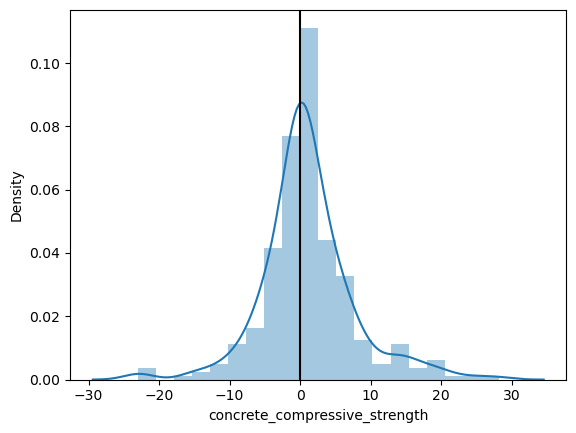

In [20]:
# For Decision Tree Model

sns.distplot(y_test - y_pred_DT,bins =20)
plt.axvline(x=0, color='k')

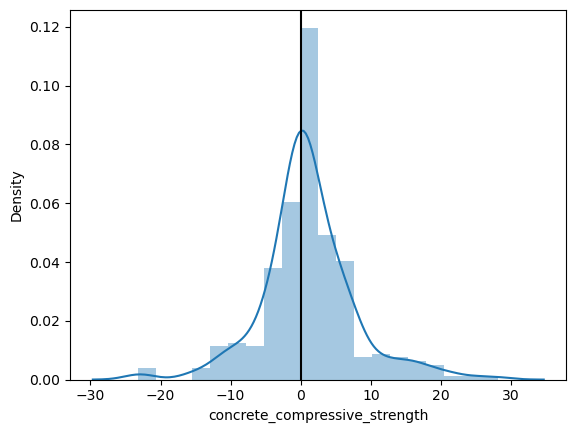

In [21]:
sns.distplot(y_test - y_pred_RF,bins =20)
plt.axvline(x=0, color='k')

In [22]:
pip install XGBoost

Note: you may need to restart the kernel to use updated packages.


In [23]:
#Using Boosting Algorithm
import xgboost as xgb

XGB = xgb.XGBRegressor()

XGB.fit(X_train, y_train)

y_pred_XGB = XGB.predict(X_test)

r2_score_XGB = r2_score(y_test, y_pred_XGB)

print(f'The R2 Score for XGBoost Model is: ', {r2_score_XGB * 100})

The R2 Score for XGBoost Model is:  {91.26401663505062}


In [27]:
#Using adaboost  algorithm
from sklearn.ensemble import AdaBoostRegressor

ADA = AdaBoostRegressor()

ADA.fit(X_train, y_train)
y_pred_ADA = ADA.predict(X_test)

r2_score_ADA = r2_score(y_test, y_pred_ADA)

print(f'The R2 Score for AdaBoost Model is: ', {r2_score_ADA * 100})

The R2 Score for AdaBoost Model is:  {80.74529183818116}
